# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

<function matplotlib.pyplot.show(close=None, block=None)>

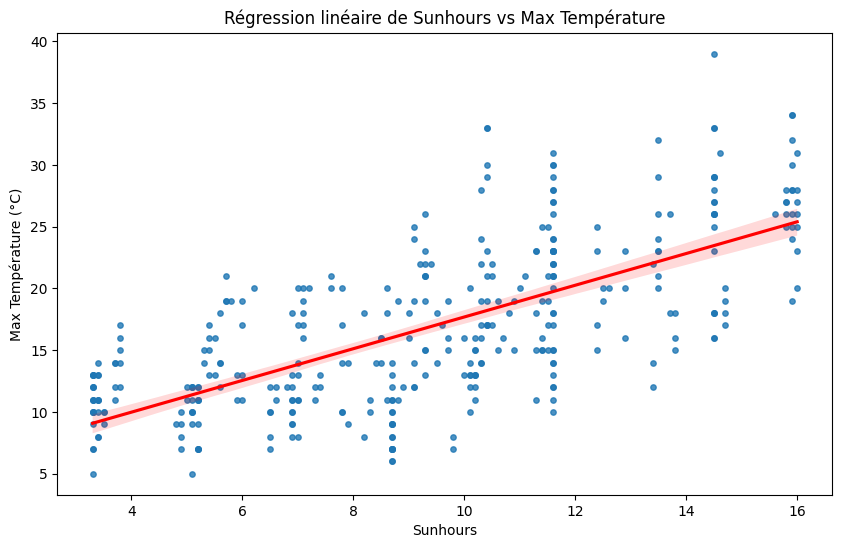

In [7]:
# Your code here :
#Extraire  les caracs  X et la variable cible y
X = df_weather[['SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

# oN divise les données en ensemble de training et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# on fait un modèle de régression linéaire
model = LinearRegression()

# On l'adapte aux données de training
model.fit(X_train, y_train)

# On fait les prédictions
y_pred = model.predict(X_test)

# On trace la ligne de régression
plt.figure(figsize=(10,6))
sns.regplot(x='SUNHOUR', y='MAX_TEMPERATURE_C', data=df_weather, scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.title('Régression linéaire de Sunhours vs Max Température')
plt.xlabel('Sunhours')
plt.ylabel('Max Température (°C)')
plt.show

## Train the model
You just have to read and execute the code below

In [9]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']]

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C']

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [8]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## Prediction for 1 value

In [10]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]]

*Why ? We'll see that in the next quest.*

In [11]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
df_weather['predict']= modelLR.predict(df_weather[['SUNHOUR']])
print(df_weather[['SUNHOUR', 'MAX_TEMPERATURE_C', 'predict']])

     SUNHOUR  MAX_TEMPERATURE_C    predict
0        5.1                  9  11.396823
1        8.7                  8  16.020019
2        8.7                  6  16.020019
3        5.1                  5  11.396823
4        8.7                  6  16.020019
..       ...                ...        ...
360      8.7                 13  16.020019
361      6.9                 11  13.708421
362      8.7                  9  16.020019
363      8.7                 12  16.020019
364      8.7                 10  16.020019

[365 rows x 3 columns]


## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is now stored in a column, you can now visualize it.

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

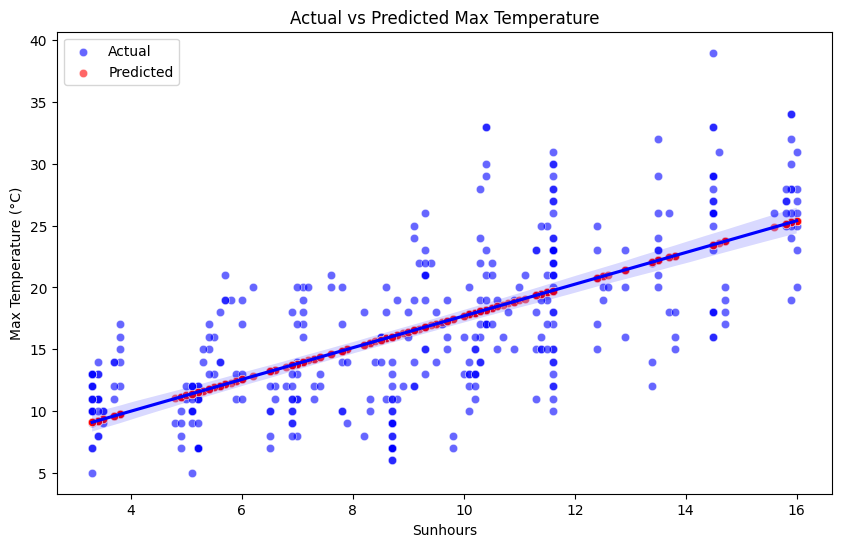

In [12]:
# Your code here :
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SUNHOUR', y='MAX_TEMPERATURE_C', data=df_weather, label='Actual', color='blue', alpha=0.6)

sns.scatterplot(x='SUNHOUR', y='predict', data=df_weather, label='Predicted', color='red', alpha=0.6)

sns.regplot(x='SUNHOUR', y='MAX_TEMPERATURE_C', data=df_weather, scatter=False, line_kws={'color': 'blue'})

plt.title('Actual vs Predicted Max Temperature')
plt.xlabel('Sunhours')
plt.ylabel('Max Temperature (°C)')
plt.legend()
plt.show()

Your prediction is stored in a DataFrame. **So, you can visualize your prediction without the "source" column.** Let's try it.
Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

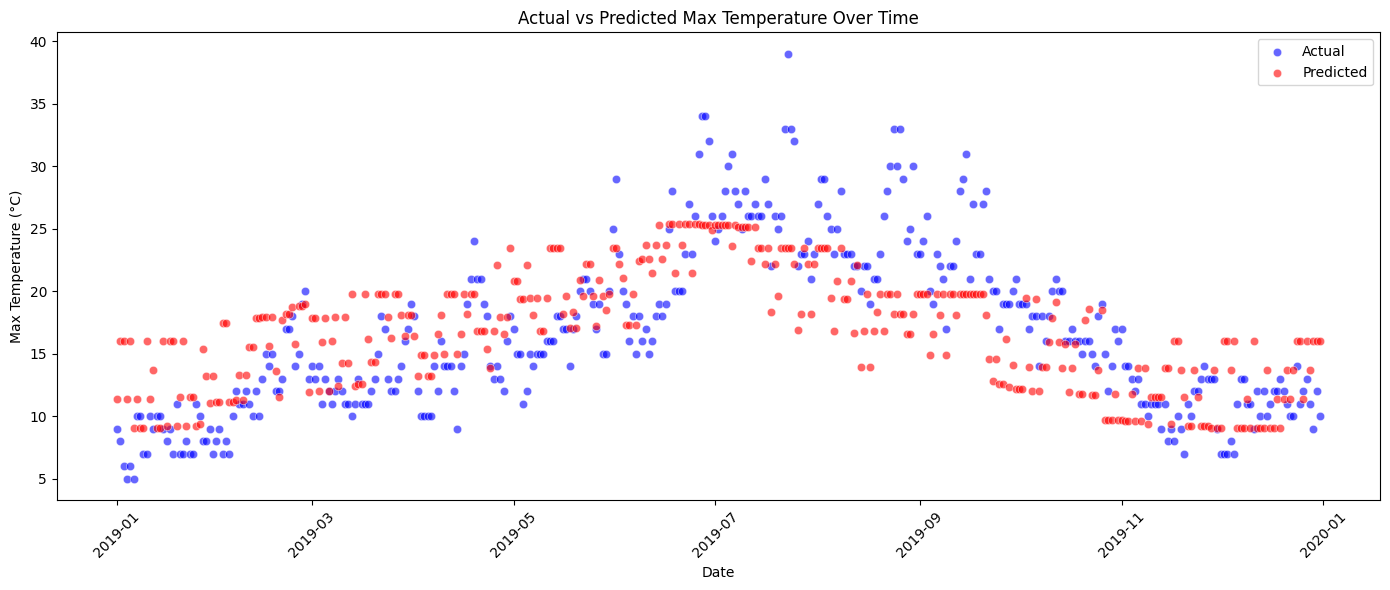

In [14]:
# Your code here :
plt.figure(figsize=(14, 6))
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

sns.scatterplot(x='DATE', y='MAX_TEMPERATURE_C', data=df_weather, label='Actual', color='blue', alpha=0.6)

sns.scatterplot(x='DATE', y='predict', data=df_weather, label='Predicted', color='red', alpha=0.6)

plt.title('Actual vs Predicted Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

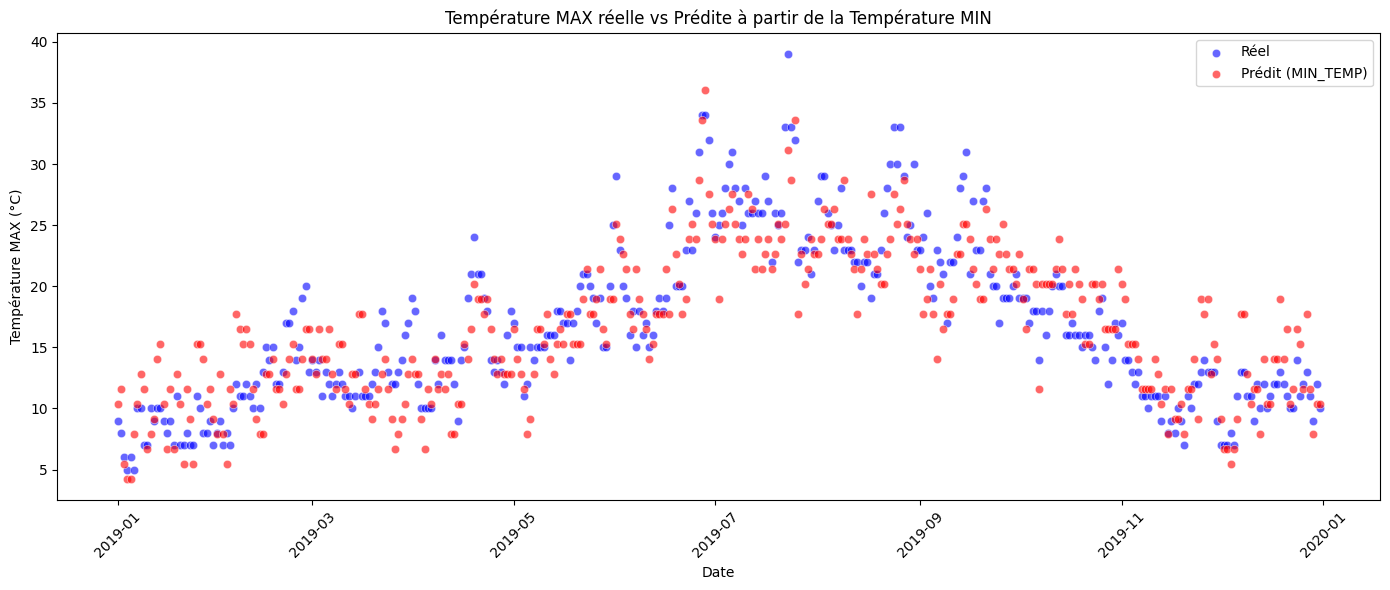

In [15]:
# Your code here :
# Extraire les caractéristiques (X) et la variable cible (y) pour la nouvelle prédiction
X_min_temp = df_weather[['MIN_TEMPERATURE_C']]
y_max_temp = df_weather['MAX_TEMPERATURE_C']

# Diviser les données en ensembles d'entraînement et de test pour la nouvelle prédiction
X_min_temp_train, X_min_temp_test, y_max_temp_train, y_max_temp_test = train_test_split(X_min_temp, y_max_temp, test_size=0.2, random_state=42)

# Créer un nouveau modèle de régression linéaire pour la nouvelle prédiction
modelLR2 = LinearRegression()

# Adapter le modèle aux données d'entraînement pour la nouvelle prédiction
modelLR2.fit(X_min_temp_train, y_max_temp_train)

# Faire des prédictions sur les données de test pour la nouvelle prédiction
df_weather['predict2'] = modelLR2.predict(X_min_temp)

# Scatterplot avec les températures MAX réelles en bleu et les valeurs prédites à partir des températures MIN en rouge
plt.figure(figsize=(14, 6))

# Scatter plot pour les températures MAX réelles
sns.scatterplot(x='DATE', y='MAX_TEMPERATURE_C', data=df_weather, label='Réel', color='blue', alpha=0.6)

# Scatter plot pour les valeurs prédites à partir des températures MIN
sns.scatterplot(x='DATE', y='predict2', data=df_weather, label='Prédit (MIN_TEMP)', color='red', alpha=0.6)

plt.title('Température MAX réelle vs Prédite à partir de la Température MIN')
plt.xlabel('Date')
plt.ylabel('Température MAX (°C)')
plt.legend()
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.tight_layout()
plt.show()


## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

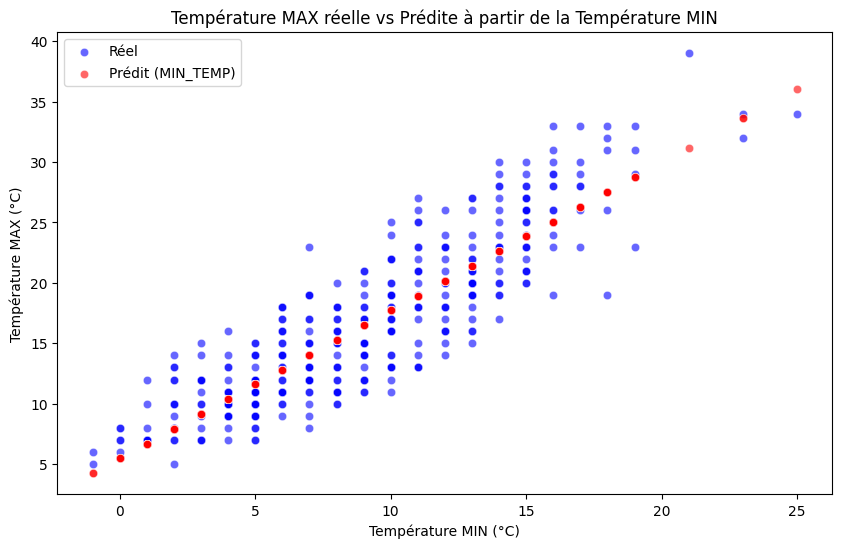

In [16]:
#Your code here :
# Scatterplot avec les températures MAX réelles en bleu et les valeurs prédites ('predict2') en rouge
plt.figure(figsize=(10, 6))

# Scatter plot pour les températures MAX réelles
sns.scatterplot(x='MIN_TEMPERATURE_C', y='MAX_TEMPERATURE_C', data=df_weather, label='Réel', color='blue', alpha=0.6)

# Scatter plot pour les valeurs prédites ('predict2')
sns.scatterplot(x='MIN_TEMPERATURE_C', y='predict2', data=df_weather, label='Prédit (MIN_TEMP)', color='red', alpha=0.6)

plt.title('Température MAX réelle vs Prédite à partir de la Température MIN')
plt.xlabel('Température MIN (°C)')
plt.ylabel('Température MAX (°C)')
plt.legend()
plt.show()


## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

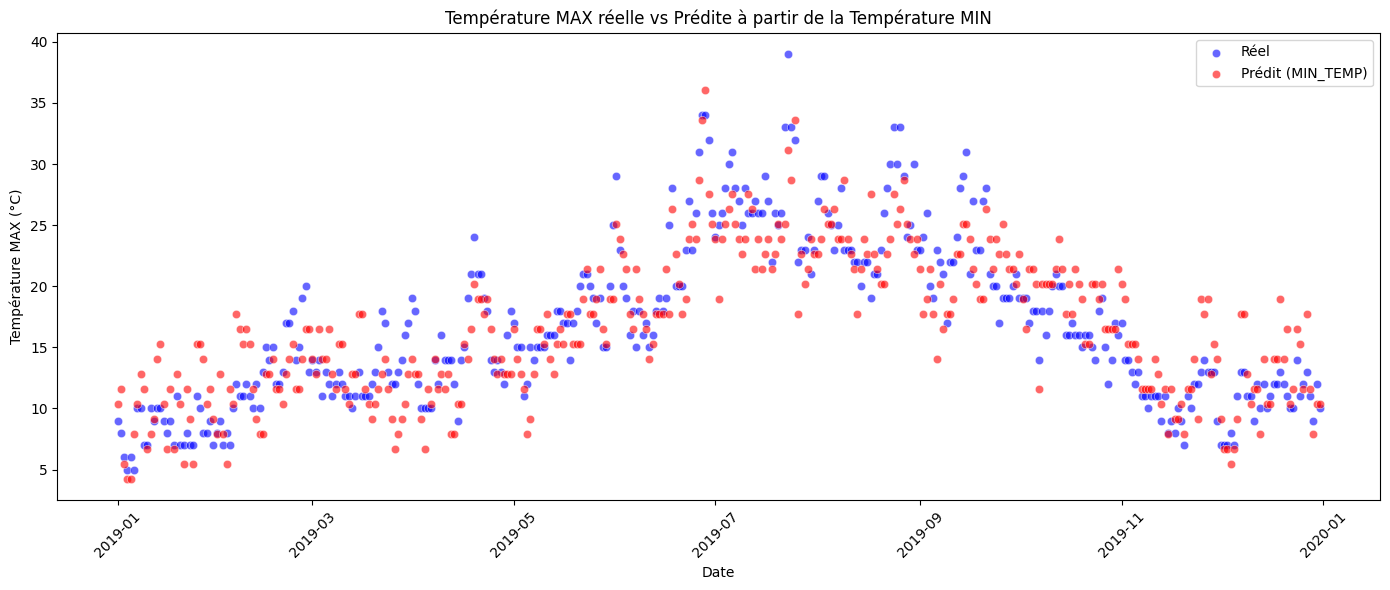

In [17]:
# Your code here :
# Scatterplot avec les températures MAX réelles en bleu et les valeurs prédites ('predict2') en rouge
plt.figure(figsize=(14, 6))

# Scatter plot pour les températures MAX réelles
sns.scatterplot(x='DATE', y='MAX_TEMPERATURE_C', data=df_weather, label='Réel', color='blue', alpha=0.6)

# Scatter plot pour les valeurs prédites ('predict2')
sns.scatterplot(x='DATE', y='predict2', data=df_weather, label='Prédit (MIN_TEMP)', color='red', alpha=0.6)

plt.title('Température MAX réelle vs Prédite à partir de la Température MIN')
plt.xlabel('Date')
plt.ylabel('Température MAX (°C)')
plt.legend()
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.tight_layout()
plt.show()
